In [506]:
import socket
import struct
import time
import multiprocessing
import matplotlib.pyplot as plt
import numpy as np

In [507]:
g = np.genfromtxt("../data/G-1.csv", dtype=np.float32, delimiter=",")

In [508]:
print(g[10000], g[10001])

-1.742987e-07 3.978862e-07


In [509]:
struct.pack("i", g.size)

b'\x80\xc6\x00\x00'

In [510]:
def connect(a):
    elapsed = time.perf_counter()
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
        sock.connect(("localhost", 3333))
        sock.sendall(g.tobytes())
        f = sock.recv(3600*4, socket.MSG_WAITALL)
        sock.close()
    elapsed = time.perf_counter() - elapsed
    print(f"Completed Execution in {elapsed} seconds")
    return elapsed

In [511]:

def testThreads(num):
    threads = []
    pool = multiprocessing.Pool()
    elapsed = max(pool.map(connect, range(num)))
    print(f"Max: {elapsed} seconds")
    return elapsed
    #ps = [];
    #for i in range(0, threads):
    #    p = Process(target=connect)
    #    p.start()
    #   ps.append(p)

    #for p in ps:
    #    p.join()

testThreads(3)

Completed Execution in 8.499822017998667 seconds
Completed Execution in 8.776556676995824 seconds
Completed Execution in 8.943309280992253 seconds
Max: 8.943309280992253 seconds


8.943309280992253

In [544]:
r = []

for i in range(5):
    r.append(testThreads(i+1))

Completed Execution in 5.623403890000191 seconds
Max: 5.623403890000191 seconds
Completed Execution in 6.445048232009867 seconds
Completed Execution in 6.652100386010716 seconds
Max: 6.652100386010716 seconds
Completed Execution in 8.627833560996805 seconds
Completed Execution in 9.442130354000255 seconds
Completed Execution in 9.519236345993704 seconds
Max: 9.519236345993704 seconds
Completed Execution in 13.406780664008693 seconds
Completed Execution in 14.3129775050038 seconds
Completed Execution in 14.32937043000129 seconds
Completed Execution in 14.39130374600063 seconds
Max: 14.39130374600063 seconds
Completed Execution in 17.984303969991743 seconds
Completed Execution in 18.938955652993172 seconds
Completed Execution in 19.17300598300062 seconds
Completed Execution in 19.517478060006397 seconds
Completed Execution in 19.664799657010008 seconds
Max: 19.664799657010008 seconds


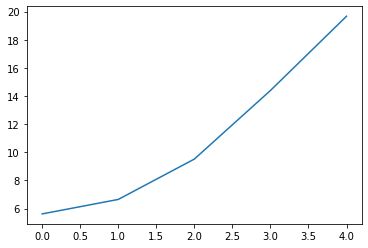

In [546]:
plt.plot(range(5), r)

In [ ]:
len(f)

14400

In [ ]:
img = np.frombuffer(f, dtype=np.float32)

In [ ]:
def view(img):
    i = img.reshape(60, 60).transpose()
    return plt.imshow(i, "gray")

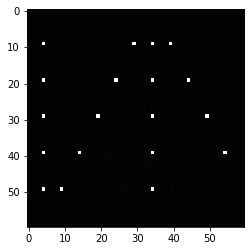

In [ ]:
view(img)